In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [175]:
train = pd.read_csv('titanic_train.csv')

In [176]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [177]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


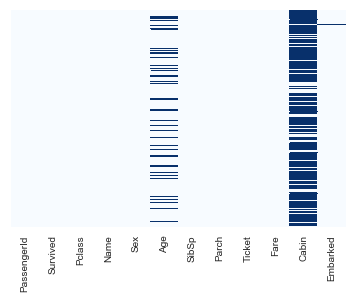

In [178]:
# Missing Data
sns.heatmap(train.isnull(),cmap='Blues', yticklabels=False, cbar=False)

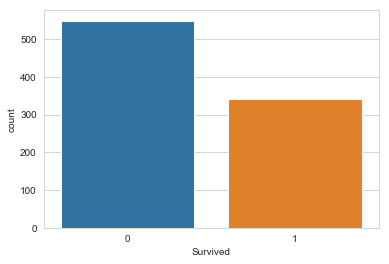

In [179]:
sns.countplot(x='Survived', data=train)

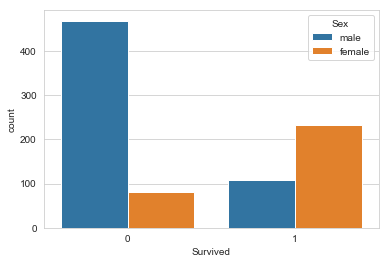

In [180]:
sns.countplot(x='Survived', data=train, hue='Sex')

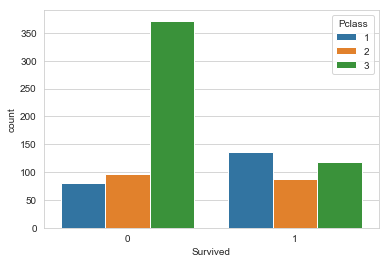

In [181]:
sns.countplot(x='Survived', data = train, hue = 'Pclass')

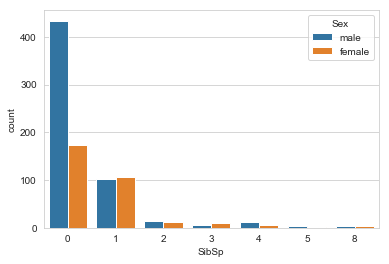

In [182]:
sns.countplot(x='SibSp', data=train, hue='Sex')

C:\Users\ashish.rane\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ashish.rane\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
C:\Users\ashish.rane\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ashish.rane\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ashish.rane\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple s

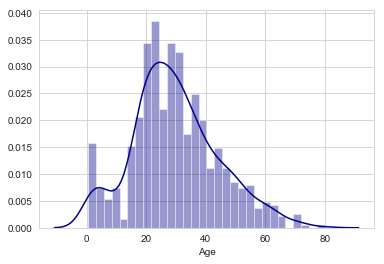

In [183]:
sns.distplot(train['Age'], bins=30, color='darkblue')

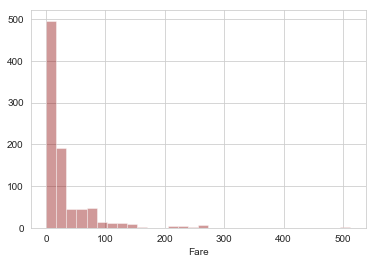

In [184]:
sns.distplot(train['Fare'], bins=30, color='darkred',kde=False)

In [185]:
# data cleaning
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [186]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


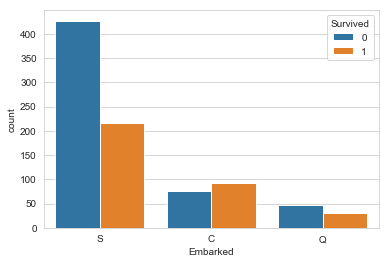

In [187]:
sns.countplot(x='Embarked', data= train.loc[train['Embarked'].notnull()], hue='Survived')

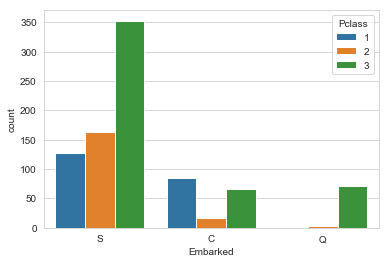

In [188]:
sns.countplot(x='Embarked', data= train.loc[train['Embarked'].notnull()], hue='Pclass')

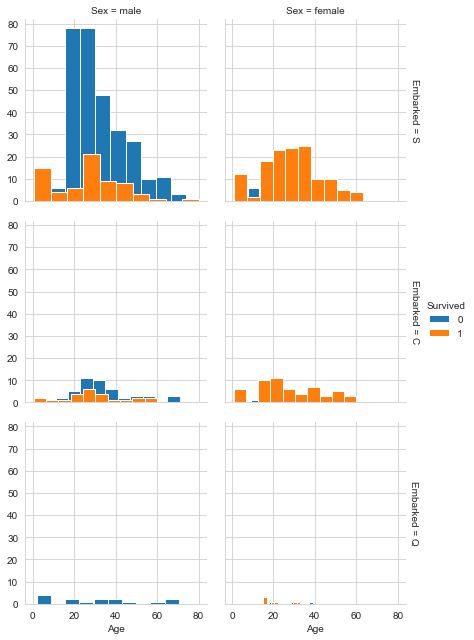

In [189]:
# Another way to look at the data
g = sns.FacetGrid(train,col="Sex", row="Embarked", margin_titles=True, hue = "Survived")
g = g.map(pp.hist, "Age", edgecolor = 'white').add_legend();

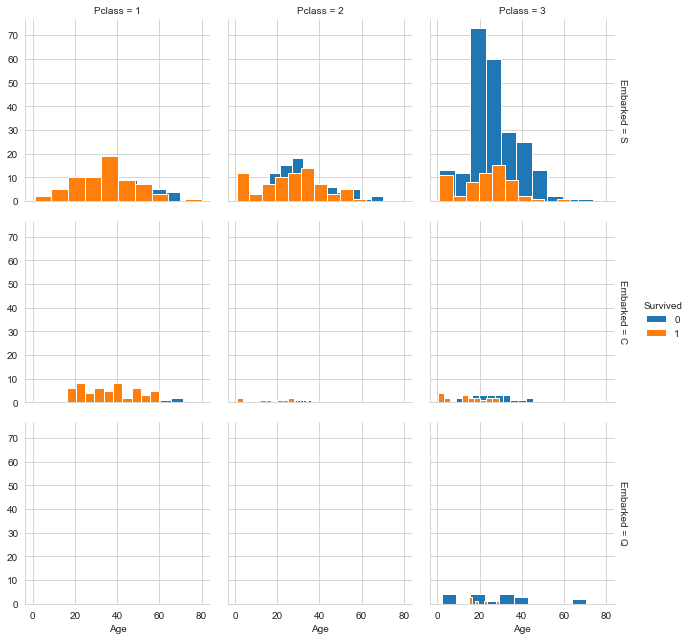

In [190]:
# Another way to look at the data
g = sns.FacetGrid(train,col="Pclass", row="Embarked", margin_titles=True, hue = "Survived")
g = g.map(pp.hist, "Age", edgecolor = 'white').add_legend();

In [191]:
train.loc[train['Embarked'].isnull(), 'Embarked'] = 'S'

In [192]:
train['Embarked'].isnull().any()

False

In [193]:
train.loc[train['Cabin'].isnull()].groupby(['Pclass']).count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,40,40,40,40,26,40,40,40,40,0,40
2,168,168,168,168,158,168,168,168,168,0,168
3,479,479,479,479,345,479,479,479,479,0,479


In [194]:
# Lets first get only keep the last name since this will help us kind of group families together, hopefully
train['LastName'] = train['Name'].apply(lambda x: x.split(',')[0])
train.drop(['Name'], inplace=True, axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [195]:
train.loc[(train['Cabin'].notnull()) & (train['Pclass'] == 2), 'Cabin'].count()

16

In [196]:
# all first class people have a cabin
train.loc[(train['Cabin'].isnull()) & (train['Pclass'] == 1), 'Cabin'].count()

0

In [197]:
train.loc[(train['Cabin'].notnull()) & (train['Pclass'] == 3), 'Cabin'].count()

12

In [198]:
# it seems people in class 2 and 3 dont have a cabin, so set it as 'N' for No cabin
train.loc[train['Cabin'].isnull() , 'Cabin'] = 'N'

In [199]:
# Now that we set it to single letter N, 
# maybe we should see if actually all Cabin start with letter and use only the first letter for analysis
train['Cabin'].astype(str).str[0].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [200]:
train['Cabin'] = train['Cabin'].astype(str).str[0].apply(lambda x : x.upper())
train['Cabin'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [201]:
train.loc[(train['Cabin'].isnull()) & (train['Pclass'] == 2), 'Cabin'].count()

0

In [202]:
train.loc[(train['Cabin'].isnull()) & (train['Pclass'] == 3), 'Cabin'].count()

0

In [203]:
train = train.drop(['Ticket'], axis = 1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,LastName
0,1,0,3,male,22.0,1,0,7.2500,N,S,Braund
1,2,1,1,female,38.0,1,0,71.2833,C,C,Cumings
2,3,1,3,female,26.0,0,0,7.9250,N,S,Heikkinen
3,4,1,1,female,35.0,1,0,53.1000,C,S,Futrelle
4,5,0,3,male,35.0,0,0,8.0500,N,S,Allen


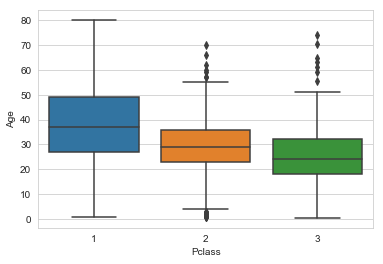

In [204]:
# Since we know th
sns.boxplot(x='Pclass', y='Age', data=train)

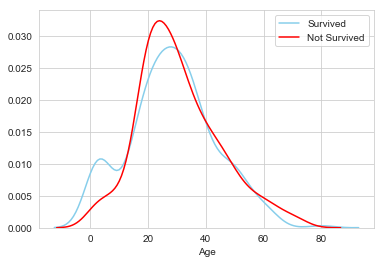

In [205]:
# Age distribution by survival
sns.distplot(train.loc[(train['Survived'] == 1) & (train['Age'].notnull()), 'Age'], color='skyblue', label='Survived', hist=False)
sns.distplot(train.loc[(train['Survived'] == 0) & (train['Age'].notnull()), 'Age'], color='red', label='Not Survived', hist=False)

In [206]:
# Since the age of survived or not survived fall into the same range it does not really give us a better picture.
# since people in that age range travelling in a higher class have more survival chances than one in class 3.
# Also we know there were many single men travelling alone in class 3
# Instea
# Lets assign missing age values by average values in the class


In [207]:
# imputation
def imputeAge(cols):
    Pclass = cols[0]
    Age = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        elif Pclass == 3:
            return 24
    else:
        return Age
    

In [208]:
train['Age'] = train[['Pclass','Age']].apply(imputeAge, axis = 1)

In [209]:
train['Age'].isnull().values.any()

False

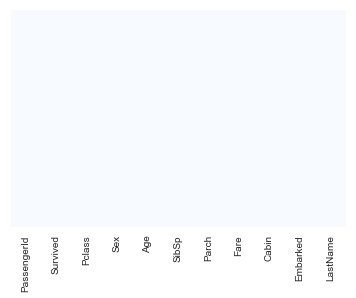

In [210]:
sns.heatmap(train.isnull(),cmap='Blues', yticklabels=False, cbar=False)

In [211]:
# Categorical Values (Sex)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,LastName
0,1,0,3,male,22.0,1,0,7.2500,N,S,Braund
1,2,1,1,female,38.0,1,0,71.2833,C,C,Cumings
2,3,1,3,female,26.0,0,0,7.9250,N,S,Heikkinen
3,4,1,1,female,35.0,1,0,53.1000,C,S,Futrelle
4,5,0,3,male,35.0,0,0,8.0500,N,S,Allen


In [212]:
# Convert the categorical featues with one hot encoding
features=['Sex', 'Embarked', 'Cabin', 'Pclass']
train = pd.get_dummies(train, columns=features, drop_first=True)
#train.drop(features, axis = 1, inplace=True)
#train = pd.concat([train,cat_feat], axis =1)
train.head()


,PassengerId,Survived,Age,SibSp,Parch,Fare,LastName,Sex_male,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,Braund,1,0,1,0,0,0,0,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,Cumings,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,Heikkinen,0,0,1,0,0,0,0,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,Futrelle,0,0,1,0,1,0,0,0,0,0,0,0,0
4,5,0,35.0,0,0,8.0500,Allen,1,0,1,0,0,0,0,0,0,1,0,0,1


In [213]:
# Convert the Last name to ordinal using label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le = le.fit(train['LastName'].values)
train['LastName'] = le.transform(train['LastName'].values)


train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,LastName,Sex_male,Embarked_Q,Embarked_S,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_N,Cabin_T,Pclass_2,Pclass_3
0,1,0,22.0,1,0,7.2500,73,1,0,1,0,0,0,0,0,0,1,0,0,1
1,2,1,38.0,1,0,71.2833,136,0,0,0,0,1,0,0,0,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,251,0,0,1,0,0,0,0,0,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,198,0,0,1,0,1,0,0,0,0,0,0,0,0
4,5,0,35.0,0,0,8.0500,11,1,0,1,0,0,0,0,0,0,1,0,0,1


In [214]:
# Building our model
from sklearn.model_selection import train_test_split

In [215]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis = 1), train['Survived'], test_size=0.3, random_state = 101)

In [216]:
from sklearn.linear_model import LogisticRegression

In [217]:
X_train.columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare', 'LastName', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_N', 'Cabin_T', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [218]:
model = LogisticRegression(solver='liblinear', max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=200, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [219]:
y_pred = model.predict(X_test)

In [220]:
error_rate = np.mean(y_test != y_pred)
error_rate

0.20522388059701493

In [221]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [222]:
print(accuracy_score(y_test, y_pred))

0.7947761194029851


In [223]:
print(confusion_matrix(y_test, y_pred))

[[136  18]
 [ 37  77]]


In [224]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       154
           1       0.81      0.68      0.74       114

   micro avg       0.79      0.79      0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



In [225]:
# Pretty Good !
# Lets see if Support Vector Machine makes a difference
from sklearn.svm import SVC

In [226]:
# For Support Vector machine its always a good idea to scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [227]:
X_train_scale=scaler.fit(X_train)

C:\Users\ashish.rane\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [228]:
X_train_scale = scaler.transform(X_train)

C:\Users\ashish.rane\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [229]:
svc = SVC()
svc.fit(X_train_scale, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [230]:
X_test_scale = scaler.transform(X_test)

C:\Users\ashish.rane\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int32, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [231]:
y_pred = svc.predict(X_test_scale)

In [232]:
error_rate = (y_test != y_pred).mean()
error_rate

0.2126865671641791

In [233]:
print(accuracy_score(y_test, y_pred))

0.7873134328358209


In [234]:
print(confusion_matrix(y_test,y_pred))


[[140  14]
 [ 43  71]]


In [235]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       154
           1       0.84      0.62      0.71       114

   micro avg       0.79      0.79      0.79       268
   macro avg       0.80      0.77      0.77       268
weighted avg       0.79      0.79      0.78       268



In [236]:
# It seems the Logistic Regression is still a slightly better alogirithm for the features provided and engineered.

0.5559701492537313